# Day036 - May 18, 2023 - Exploratory Data Analysis
## Data Analytics 2: Data Visualization & Predictions
### College GPA Predictor - Models & Predictive Statistics

## Written by: Joseph P Merten

## Assignment submission:  https://lms.grandcircus.co/mod/assign/view.php?id=25283
## Assignment requirements: https://docs.google.com/document/d/1C8Q3vmKDRAHfy6pjHkXb3x0boiR9evqNXogUtzFI514/preview#heading=h.rfelkkkw1wcf
    

### What will the analysis contain?
- Scatter plot representing the relationship between GPA and SAT scores
- Linear regression model
- Statistical interpretation of regression model results

### Analysis Specifications
- You may use seaborn or matplotlib to plot the regression. Plot must include:
1. Title
1. X-axis title
1. Y-axis title
1. Proper dimensions
1. Interpretation of results requires stating whether there is a significant or insignificant relationship between the independent and dependent variables and why.

You may use statsmodels to run the regression


#### Additional notes & links.
- Since ther SAT is being used to predict college performance, that will be the input to the regression.
- review the Predictive Analysis document: https://docs.google.com/document/d/1J2ZXBvdoE3T-GtOYHDwepcPKYr_je5J9Ql1f8qq_yjc/preview
- Here is an interesting explanation about linear regression: https://realpython.com/linear-regression-in-python/
- Maybe use sklearn for the regresssion.
- Maybe use seaborn for the chart.
- Discussion about [Significance of the Correlation Coefficient](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(OpenStax)/12%3A_Linear_Regression_and_Correlation/12.05%3A_Testing_the_Significance_of_the_Correlation_Coefficient).
- [Correlation Test in Python](https://www.statology.org/correlation-test-in-python/).
- https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
- https://stackoverflow.com/questions/30286095/do-i-need-to-add-a-constant-when-using-sm-ols
- Article on linear regression: https://realpython.com/linear-regression-in-python/

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

### Read the data...

In [2]:
data_url = 'sat_gpa_v1.csv'
# print(data_url)
sat_df = pd.read_csv(data_url)
print(sat_df)

     sat_sum  fy_gpa
0       1270    3.18
1       1220    3.33
2       1160    3.25
3        950    2.42
4       1070    2.63
..       ...     ...
995     1000    2.19
996     1080    1.50
997     1140    3.17
998     1200    1.94
999      930    2.38

[1000 rows x 2 columns]


<AxesSubplot: title={'center': 'Predictive analysis of SAT cummulative versus first year college GPA'}, xlabel='Cumulative SAT score', ylabel='GPA after first year of college'>

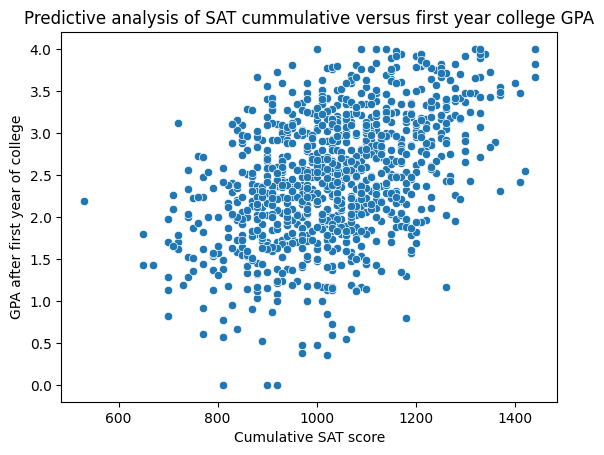

In [3]:
plt.title("Predictive analysis of SAT cummulative versus first year college GPA") #title
plt.xlabel("Cumulative SAT score") #x label
plt.ylabel("GPA after first year of college") #y label

sns.scatterplot(x="sat_sum",
                    y="fy_gpa",
                    data=sat_df)

<AxesSubplot: title={'center': 'Predictive analysis of SAT cummulative versus first year college GPA\nIncluding linear regression.'}, xlabel='sat_sum', ylabel='fy_gpa'>

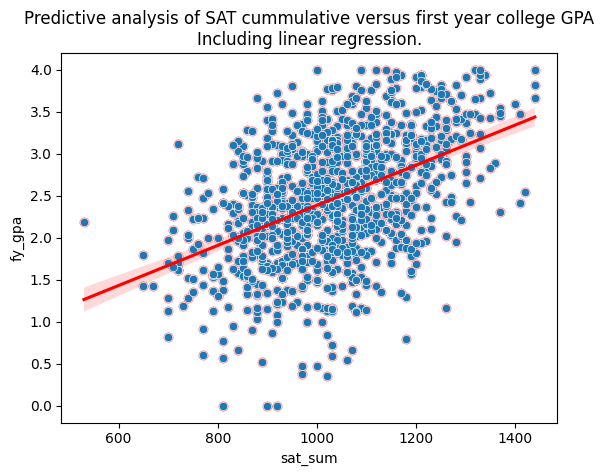

In [4]:
plt.title("Predictive analysis of SAT cummulative versus first year college GPA\nIncluding linear regression.") #title
plt.xlabel("Cumulative SAT score") #x label
plt.ylabel("GPA after first year of college") #y label
sns.regplot(x="sat_sum",
            y="fy_gpa",
            data=sat_df,
            color="red")
sns.scatterplot(x="sat_sum",
                y="fy_gpa",
                data=sat_df)

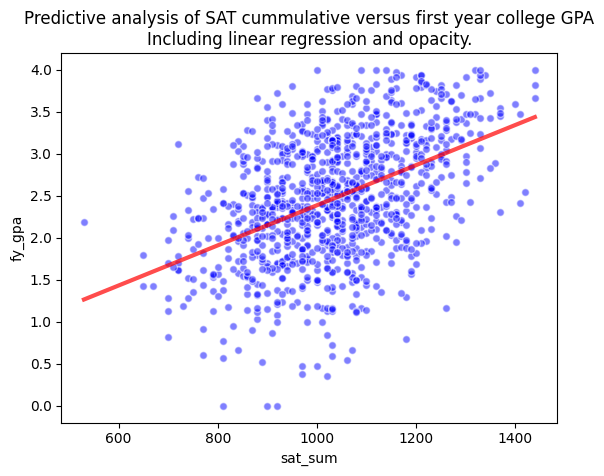

In [5]:
plt.title("Predictive analysis of SAT cummulative versus first year college GPA\nIncluding linear regression and opacity.") #title
plt.xlabel("Cumulative SAT score") #x label
plt.ylabel("GPA after first year of college") #y label

# cleaner way to plot...
ax = sns.regplot(x="sat_sum", y="fy_gpa", data=sat_df, ci=False, 
                 scatter_kws=dict(alpha=0.5, s=30, color='blue', edgecolors='white'),
                 line_kws=dict(alpha=0.7, color='red', linewidth=3))

In [6]:
# Interpretation of results requires stating whether there is a significant or insignificant relationship between the independent and dependent variables and why.

# X = independant (input) variables.
X = sat_df['sat_sum']

# y =  Dependant (output) variables
y = sat_df['fy_gpa']

# assign a constant for the sm
X2 = sm.add_constant(X)

results = sm.OLS(y, X2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fy_gpa   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     268.3
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.39e-53
Time:                        02:48:22   Log-Likelihood:                -999.38
No. Observations:                1000   AIC:                             2003.
Df Residuals:                     998   BIC:                             2013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.152      0.013      0.990      -0.296       0.300
sat_sum        0.0024      0.000     16.379      0.000       0.002       0.003
==============================================================================
Omnibus:                       16.394   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.860
Skew:                          -0.318   Prob(JB):                     0.000218
Kurtosis:                       3.037   Cond. No.                     7.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Statistical Interpretation
R-squared is the measure of how well the regression line preficts the data points. 
A value of 1 indicates a perfect relationship, but is a probable flag of over-fitting.
A value of 0 indicates no correlation.
A value of -1 indicates a perfectly negative correlation.  Again a possible sign of over fitting.

The upward trend of both the regression line and the scatter plot indicates a positive relationship, but with an R-squared:	0.212, this doesn't appear to be a very strong relationship.  

My next steps would be to explor possible missing data that might develop a stronger correlation/